AGE, GENDER AND ETHNICITY (FACE DATA) PREDICTIONS


Details:

ETHNICITIES = [ 0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Hispanic" ]

GENDERS = [ 0: "Male", 1: "Female" ]

In [6]:
#IMPORTING USEFULL LIBRARIES 
import numpy as np 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [4]:
data=pd.read_csv("C:/Recent Download/age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
#Missing values
data.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

There are no missing values in dataset.

In [4]:
data.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [5]:
def basic_eda(data):
    print("\n Shape: ")
    print(data.shape)
    print("\n Value count of age: ")
    print(data['age'].value_counts())
    print("\n\n --------- ")
    print("\n Value count of ethnicity: ")
    print(data['ethnicity'].value_counts())
    print("\n\n --------- ")
    print("\n Value count of gender: ")
    print(data['gender'].value_counts())

In [6]:
basic_eda(data)


 Shape: 
(23705, 5)

 Value count of age: 
26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64


 --------- 

 Value count of ethnicity: 
0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64


 --------- 

 Value count of gender: 
0    12391
1    11314
Name: gender, dtype: int64


C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

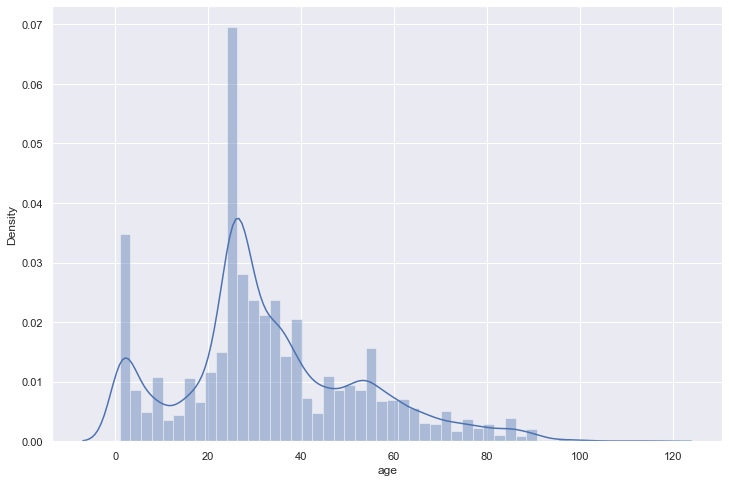

In [7]:
#Data Visualization
#Distplot for Age feature
plt.figure(figsize=(12,8))
sns.distplot(data['age'])

Most of the peoples are between age 20-50.

C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ethnicity', ylabel='count'>

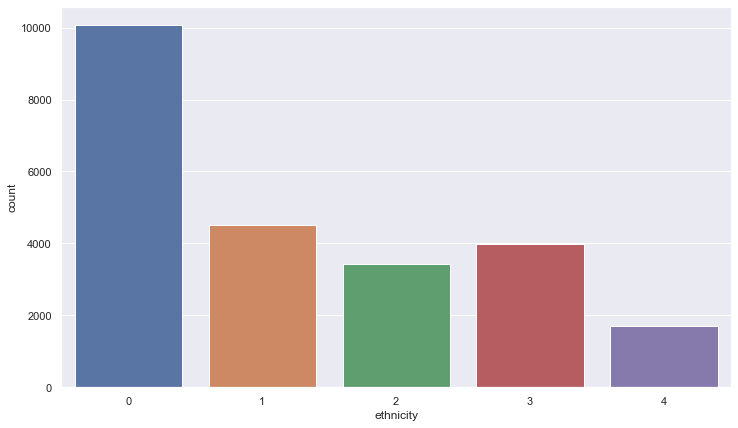

In [8]:
#Countplot for ethnicity features
plt.figure(figsize=(12,7))
sns.countplot(data['ethnicity'])

0: Category is the most.

C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

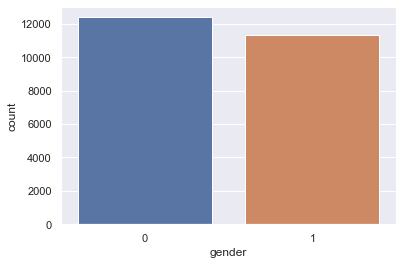

In [9]:
#Countplot for gender features
sns.countplot(data['gender'])

Males are more in numbers.

In [10]:
data['pixels'] = data['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48, 48))

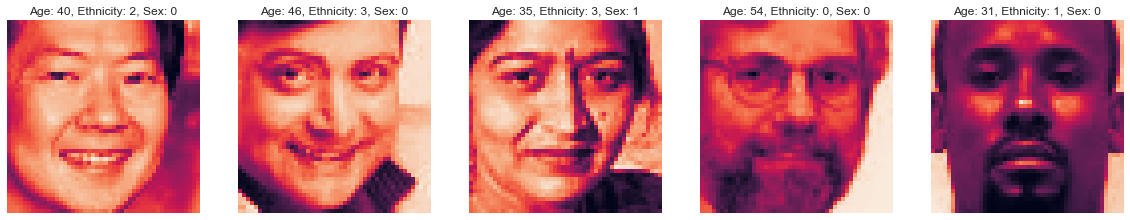

In [11]:
# Ploting pictures
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    random_face = np.random.choice(len(data))
    
    age = data['age'][random_face]
    ethnicity = data['ethnicity'][random_face]
    gender = data['gender'][random_face]
    
    axes[i].set_title('Age: {0}, Ethnicity: {1}, Sex: {2}'.format(age, ethnicity, gender))
    axes[i].imshow(data['pixels'][random_face])
    axes[i].axis('off')


AGE PREDICTION

In [12]:
X = np.array(data['pixels'].to_list())
X_reshaped = X.reshape(X.shape[0], 48, 48, 1)
if np.max(X_reshaped) > 1: X_reshaped = X_reshaped / 255
input_shape = X_reshaped.shape[1:] 
y = data['age'].values

In [13]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [14]:
#Model for age 
age_model = Sequential()

age_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(BatchNormalization())

age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())
age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.5))
age_model.add(BatchNormalization())

age_model.add(Flatten())
age_model.add(Dense(128, activation='relu'))
age_model.add(Dropout(0.4))
age_model.add(Dense(1))
age_model.compile(optimizer='adam', loss='mse')
age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0

In [22]:
#Epoch and batch_size for age
n_epochs = 50
batch_size = 64

In [16]:
# Callbacks for age model
callbacks = [EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)] 

In [17]:
history = age_model.fit(X_train, y_train, 
                        epochs=n_epochs,
                        batch_size=batch_size,
                        callbacks=callbacks,
                        validation_data=(X_test, y_test))

Epoch 1/50
297/297 [==============================] - 420s 1s/step - loss: 238.0335 - val_loss: 1713.0024 - lr: 0.0010
Epoch 2/50
297/297 [==============================] - 412s 1s/step - loss: 136.3348 - val_loss: 288.1649 - lr: 0.0010
Epoch 3/50
297/297 [==============================] - 425s 1s/step - loss: 119.3807 - val_loss: 177.6448 - lr: 0.0010
Epoch 4/50
297/297 [==============================] - 414s 1s/step - loss: 105.1685 - val_loss: 113.8838 - lr: 0.0010
Epoch 5/50
297/297 [==============================] - 398s 1s/step - loss: 98.0744 - val_loss: 123.3734 - lr: 0.0010
Epoch 6/50
297/297 [==============================] - ETA: 0s - loss: 92.5603
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
297/297 [==============================] - 389s 1s/step - loss: 92.5603 - val_loss: 147.0889 - lr: 0.0010
Epoch 7/50
297/297 [==============================] - 367s 1s/step - loss: 77.4127 - val_loss: 73.0050 - lr: 1.0000e-04
Epoch 8/50
297/297 [=====

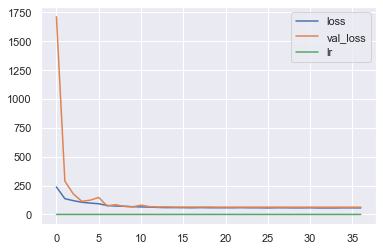

In [18]:
pd.DataFrame(history.history).plot();

In [19]:
valid_score = age_model.evaluate(X_test, y_test, verbose=1)

149/149 [==============================] - 18s 123ms/step - loss: 62.5855


In [20]:
y_pred = age_model.predict(X_test)

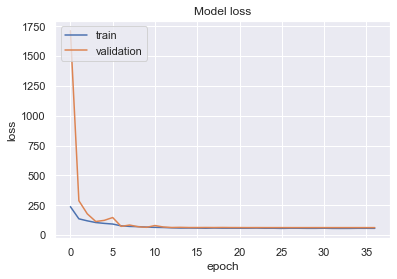

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [22]:
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))

MAE: 5.6023929391611835


In [7]:
tf.keras.models.save_model(age_model,'Age_model.hdf5')

NameError: name 'age_model' is not defined

GENDER 

In [14]:
y=data['gender'].values
X_train,X_test,y_train,y_test=train_test_split(X_reshaped,y,test_size=0.2,random_state=42)

In [15]:
#Model for Gender

gender_model = Sequential()

gender_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.4))
gender_model.add(BatchNormalization())
gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())
gender_model.add(Dense(64, activation='relu'))
gender_model.add(Dropout(0.4))
gender_model.add(Dense(1,activation='sigmoid'))
gender_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
gender_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                        

In [15]:
# Callbacks for gender model
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
             ReduceLROnPlateau(patience=2, verbose=1)] 

In [16]:
history = gender_model.fit(X_train, y_train, 
                           epochs=n_epochs,
                           batch_size=batch_size,
                           callbacks=callbacks,
                           validation_data=(X_test, y_test))

Epoch 1/50
297/297 [==============================] - 267s 897ms/step - loss: 0.5015 - accuracy: 0.7637 - val_loss: 0.9938 - val_accuracy: 0.5206 - lr: 0.0010
Epoch 2/50
297/297 [==============================] - 199s 670ms/step - loss: 0.3568 - accuracy: 0.8401 - val_loss: 0.4820 - val_accuracy: 0.7439 - lr: 0.0010
Epoch 3/50
297/297 [==============================] - 151s 510ms/step - loss: 0.3095 - accuracy: 0.8630 - val_loss: 0.2974 - val_accuracy: 0.8661 - lr: 0.0010
Epoch 4/50
297/297 [==============================] - 160s 539ms/step - loss: 0.2948 - accuracy: 0.8693 - val_loss: 0.2728 - val_accuracy: 0.8789 - lr: 0.0010
Epoch 5/50
297/297 [==============================] - 152s 511ms/step - loss: 0.2716 - accuracy: 0.8801 - val_loss: 0.2721 - val_accuracy: 0.8819 - lr: 0.0010
Epoch 6/50
297/297 [==============================] - 152s 511ms/step - loss: 0.2612 - accuracy: 0.8860 - val_loss: 0.2550 - val_accuracy: 0.8823 - lr: 0.0010
Epoch 7/50
297/297 [==========================

In [17]:
valid_score = gender_model.evaluate(X_test, y_test, verbose=1)
print('Accuracy for test set: {0}'.format(valid_score[1]))

149/149 [==============================] - 10s 64ms/step - loss: 0.2299 - accuracy: 0.9120
Accuracy for test set: 0.9120438694953918


In [18]:
y_pred = gender_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2468
           1       0.90      0.91      0.91      2273

    accuracy                           0.91      4741
   macro avg       0.91      0.91      0.91      4741
weighted avg       0.91      0.91      0.91      4741



<AxesSubplot:>

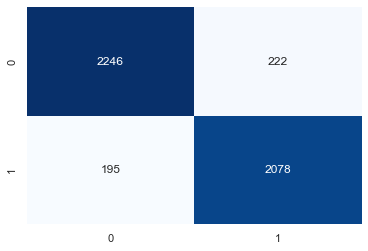

In [19]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, fmt='d')

In [ ]:
tf.keras.models.save_model(gender_model,'Gender_model.hdf5')

Ethnicity

In [16]:
y=data['ethnicity'].values
y=to_categorical(y,5)
y


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_reshaped,y,test_size=0.2,random_state=42)

In [29]:
#Model for Ethicity

eth_model = Sequential()

eth_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
eth_model.add(MaxPooling2D(pool_size=(2,2)))
eth_model.add(BatchNormalization())

eth_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
eth_model.add(MaxPooling2D(pool_size=(2,2)))
eth_model.add(BatchNormalization())

eth_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
eth_model.add(MaxPooling2D(pool_size=(2,2)))
eth_model.add(Dropout(0.5))
eth_model.add(BatchNormalization())
eth_model.add(Flatten())
eth_model.add(Dense(128, activation='relu'))
eth_model.add(Dropout(0.5))
eth_model.add(Dense(5, activation='sigmoid')) 
eth_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
eth_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 23, 23, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                      

In [30]:
# Callbacks for age model
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
             ReduceLROnPlateau(patience=2, verbose=1)] 

In [32]:
history = eth_model.fit(X_train, y_train, 
                           epochs=n_epochs,
                           batch_size=batch_size,
                           callbacks=callbacks,
                           validation_data=(X_test, y_test))

Epoch 1/50
297/297 [==============================] - 153s 503ms/step - loss: 1.1902 - accuracy: 0.5696 - val_loss: 3.8914 - val_accuracy: 0.4318 - lr: 0.0010
Epoch 2/50
297/297 [==============================] - 136s 458ms/step - loss: 0.8936 - accuracy: 0.6873 - val_loss: 1.0963 - val_accuracy: 0.5959 - lr: 0.0010
Epoch 3/50
297/297 [==============================] - 130s 437ms/step - loss: 0.8111 - accuracy: 0.7178 - val_loss: 0.9042 - val_accuracy: 0.7074 - lr: 0.0010
Epoch 4/50
297/297 [==============================] - 126s 424ms/step - loss: 0.7383 - accuracy: 0.7444 - val_loss: 0.6929 - val_accuracy: 0.7547 - lr: 0.0010
Epoch 5/50
297/297 [==============================] - 126s 424ms/step - loss: 0.6910 - accuracy: 0.7646 - val_loss: 1.0189 - val_accuracy: 0.6075 - lr: 0.0010
Epoch 6/50
297/297 [==============================] - ETA: 0s - loss: 0.6387 - accuracy: 0.7805
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
297/297 [===================

In [33]:
valid_score = eth_model.evaluate(X_test, y_test, verbose=1)
print('Accuracy for test set: {0}'.format(valid_score[1]))

149/149 [==============================] - 8s 54ms/step - loss: 0.5543 - accuracy: 0.8150
Accuracy for test set: 0.8150179386138916


In [34]:
y_pred = eth_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [36]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.99      0.65      2047
           1       0.56      0.96      0.71       904
           2       0.55      0.95      0.70       657
           3       0.31      0.98      0.47       804
           4       0.08      0.95      0.15       329

   micro avg       0.35      0.97      0.51      4741
   macro avg       0.40      0.97      0.53      4741
weighted avg       0.45      0.97      0.60      4741
 samples avg       0.38      0.97      0.54      4741



C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tf.keras.models.save_model(eth_model,'eth_model.hdf5')

Mean squared Error for Age=5.60
Accuracy for Gender=91.20
Accuracy for Ethnicity=81.50

According to Accuracy & MSE value the model is stable to predict a persons age,gender & ethnicity.